In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Preprocessing

In [2]:
df = pd.read_csv('WeatherAUS.csv')

In [3]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
df['RainTomorrow'].replace(['No', 'Yes'], [0.0, 1.0], inplace=True)

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,0.0


In [7]:
df_columns = df.columns.copy()

In [8]:
df_train = pd.DataFrame(columns =  df_columns)
df_validation = pd.DataFrame(columns =  df_columns)
df_test = pd.DataFrame(columns =  df_columns)

In [9]:
for city in np.unique(df['Location']):

    temp_df = df[df['Location'] == city].copy()
    temp_df.sort_values(by=['Date'], inplace=True)
    number_of_rows = temp_df.shape[0]

    df_train = pd.concat([df_train, temp_df[:int(0.6*number_of_rows)].copy()], ignore_index=True)
    df_validation = pd.concat([df_validation, temp_df[int(0.6*number_of_rows):int(0.8*number_of_rows)].copy()], ignore_index=True)
    df_test = pd.concat([df_test, temp_df[int(0.8*number_of_rows):].copy()], ignore_index=True)

In [10]:
df_train

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-07-01,Adelaide,8.8,15.7,5.0,1.6,2.6,NW,48.0,SW,...,92.0,67.0,1017.4,1017.7,NaN,NaN,13.5,14.9,Yes,0.0
1,2008-07-02,Adelaide,12.7,15.8,0.8,1.4,7.8,SW,35.0,SSW,...,75.0,52.0,1022.4,1022.6,NaN,NaN,13.7,15.5,No,0.0
2,2008-07-03,Adelaide,6.2,15.1,0.0,1.8,2.1,W,20.0,NNE,...,81.0,56.0,1027.8,1026.5,NaN,NaN,9.3,13.9,No,0.0
3,2008-07-04,Adelaide,5.3,15.9,0.0,1.4,8.0,NNE,30.0,NNE,...,71.0,46.0,1028.7,1025.6,NaN,NaN,10.2,15.3,No,0.0
4,2008-07-05,Adelaide,9.8,15.4,0.0,NaN,0.9,N,30.0,NNE,...,56.0,67.0,1023.6,1020.2,NaN,NaN,11.3,13.8,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87252,2014-03-05,Woomera,21.7,36.1,0.0,12.0,11.3,SSE,52.0,SE,...,42.0,15.0,1016.5,1014.1,1.0,1.0,23.5,35.2,No,0.0
87253,2014-03-06,Woomera,17.1,32.2,0.0,15.0,11.8,SSE,46.0,SSE,...,57.0,25.0,1017.6,1015.3,0.0,0.0,19.3,31.0,No,0.0
87254,2014-03-07,Woomera,15.5,31.4,0.0,12.0,11.8,SE,44.0,S,...,56.0,21.0,1019.6,1017.4,0.0,1.0,18.0,29.5,No,0.0
87255,2014-03-08,Woomera,17.7,35.7,0.0,9.9,9.0,NNW,31.0,SE,...,44.0,16.0,1017.4,1013.8,0.0,3.0,21.7,34.5,No,0.0


In [11]:
percent_missing = df_train.isnull().sum() * 100 / len(df_train)
drop_columns = df_train.columns[percent_missing >= 36]

In [12]:
drop_columns

Index(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], dtype='object')

In [13]:
df_train.drop(labels=drop_columns, axis=1, inplace= True)
df_validation.drop(labels=drop_columns, axis=1, inplace= True)
df_test.drop(labels=drop_columns, axis=1, inplace= True)

In [14]:
# date_save = (pd.to_datetime(df['Date'], yearfirst=True))
# df.drop(labels=['Date'], axis=1, inplace= True)

In [15]:
def fill_blanks (df):
    dict_fills = {}
    for each_column in df.columns:
        if each_column in df.select_dtypes(['object']).columns:
            dict_fills[each_column] = df[each_column].mode()[0]
            #df[each_column].fillna(dict_fills[each_column], inplace = True)
        elif each_column in df.select_dtypes(['float64']).columns:
            dict_fills[each_column] = df[each_column].median()
            #df[each_column].fillna(dict_fills[each_column], inplace = True)
        else:
            dict_fills[each_column] = df[each_column].median()
            #df[each_column].fillna(dict_fills[each_column], inplace = True)
    return(dict_fills)

In [16]:
dict_fills = fill_blanks(df_train)

In [17]:
dict_fills

{'Date': Timestamp('2011-07-17 00:00:00'),
 'Location': 'Canberra',
 'MinTemp': 11.9,
 'MaxTemp': 22.5,
 'Rainfall': 0.0,
 'WindGustDir': 'W',
 'WindGustSpeed': 39.0,
 'WindDir9am': 'N',
 'WindDir3pm': 'SE',
 'WindSpeed9am': 13.0,
 'WindSpeed3pm': 19.0,
 'Humidity9am': 70.0,
 'Humidity3pm': 52.0,
 'Pressure9am': 1017.4,
 'Pressure3pm': 1015.0,
 'Temp9am': 16.6,
 'Temp3pm': 21.0,
 'RainToday': 'No',
 'RainTomorrow': 0.0}

In [18]:
for each_column in df_train.columns:
    df_train[each_column].fillna(dict_fills[each_column], inplace = True)
    df_validation[each_column].fillna(dict_fills[each_column], inplace = True)
    df_test[each_column].fillna(dict_fills[each_column], inplace = True)

In [19]:
df_train.sort_values(by=['Location', 'Date'], inplace=True)
df_validation.sort_values(by=['Location', 'Date'], inplace=True)
df_test.sort_values(by=['Location', 'Date'], inplace=True)

In [20]:
df_train_lable = df_train['RainTomorrow'].copy()
df_train_lable = np.asarray(df_train_lable)
df_validation_lable = df_validation['RainTomorrow'].copy()
df_validation_lable = np.asarray(df_validation_lable)
df_test_lable = df_test['RainTomorrow'].copy()
df_test_lable = np.asarray(df_test_lable)

In [21]:
df_train.drop(labels=['Date', 'RainTomorrow', 'RainToday'], axis=1, inplace= True)#,  'WindGustDir', 'WindDir9am', 'WindDir3pm'
df_validation.drop(labels=['Date', 'RainTomorrow', 'RainToday'], axis=1, inplace= True)#,  'WindGustDir', 'WindDir9am', 'WindDir3pm'
df_test.drop(labels=['Date', 'RainTomorrow', 'RainToday'], axis=1, inplace= True)#,  'WindGustDir', 'WindDir9am', 'WindDir3pm'

In [22]:
def ohencoder (df):
    # creating instance of one-hot-encoder
    enc = preprocessing.OneHotEncoder(handle_unknown='ignore')
    # passing bridge-types-cat column (label encoded values of bridge_types)
    onehotencoder_data = enc.fit_transform(df[df.select_dtypes(['object']).columns]).toarray()
    list_columns_name = []
    for i in range(len(onehotencoder_data[0])):
        list_columns_name.append('Type '+ str(i+1))
    enc_df = pd.DataFrame(data=onehotencoder_data , columns= list_columns_name)
    # merge with main df bridge_df on key values
    df = df.join(enc_df)
    for col in df.select_dtypes(['object']).columns:
        df.drop(col, axis=1, inplace=True)

    return (df, enc)

In [23]:
def test_ohencoder (X_test, enc):
    onehotencoder_data = enc.transform(X_test[X_test.select_dtypes(['object']).columns]).toarray()
    list_columns_name = []
    for i in range(len(onehotencoder_data[0])):
        list_columns_name.append('Type '+ str(i+1))
    enc_test = pd.DataFrame(data=onehotencoder_data , columns= list_columns_name)

    X_test = X_test.join(enc_test)
    for col in X_test.select_dtypes(['object']).columns:
        X_test.drop(col, axis=1, inplace=True)

    return(X_test)

In [24]:
df_train, transfer_onehot = ohencoder(df_train)

In [25]:
df_validation = test_ohencoder (df_validation, transfer_onehot)
df_test = test_ohencoder (df_test, transfer_onehot)

In [26]:
df_train

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,Type 88,Type 89,Type 90,Type 91,Type 92,Type 93,Type 94,Type 95,Type 96,Type 97
0,8.8,15.7,5.0,48.0,13.0,15.0,92.0,67.0,1017.4,1017.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,12.7,15.8,0.8,35.0,13.0,15.0,75.0,52.0,1022.4,1022.6,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,6.2,15.1,0.0,20.0,2.0,11.0,81.0,56.0,1027.8,1026.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,5.3,15.9,0.0,30.0,6.0,13.0,71.0,46.0,1028.7,1025.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.8,15.4,0.0,30.0,9.0,9.0,56.0,67.0,1023.6,1020.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87252,21.7,36.1,0.0,52.0,20.0,22.0,42.0,15.0,1016.5,1014.1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
87253,17.1,32.2,0.0,46.0,28.0,19.0,57.0,25.0,1017.6,1015.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87254,15.5,31.4,0.0,44.0,31.0,20.0,56.0,21.0,1019.6,1017.4,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87255,17.7,35.7,0.0,31.0,17.0,11.0,44.0,16.0,1017.4,1013.8,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
learn_scaler=StandardScaler().fit(df_train)

standard_df_train = learn_scaler.transform(df_train)
standard_df_validation = learn_scaler.transform(df_validation)
standard_df_test = learn_scaler.transform(df_test)

# standard_df_train = np.asarray(df_train)
# standard_df_validation = np.asarray(df_validation)
# standard_df_test = np.asarray(df_test)

In [28]:
def shaping(datain, timestep, rainny):
    
    X_comb = []
    Y_comb = []
    cnt=0
    for mth in range(0, len(datain)-(timestep)): # Define range 
        
        cnt=cnt+1 # Gives us the number of samples. Later used to reshape the data
        X_start=mth # Start day for inputs of each sample
        X_end=mth+timestep # End day for inputs of each sample

        X_comb.append(datain[X_start:X_end, :])
        Y_comb.append(rainny[X_end])

    return(np.asarray(X_comb), np.asarray(Y_comb))

In [29]:
# 5 Days 
x_train, y_train= shaping (standard_df_train, 5, df_train_lable)
x_validation, y_validation= shaping (standard_df_validation, 5, df_validation_lable)
x_test, y_test= shaping (standard_df_test, 5, df_test_lable)

# 3 Days
# x_train, y_train= shaping (standard_df_train, 3, df_train_lable)
# x_validation, y_validation= shaping (standard_df_validation, 3, df_validation_lable)
# x_test, y_test= shaping (standard_df_test, 3, df_test_lable)

# 10 Days 
# x_train, y_train= shaping (standard_df_train, 10, df_train_lable)
# x_validation, y_validation= shaping (standard_df_validation, 10, df_validation_lable)
# x_test, y_test= shaping (standard_df_test, 10, df_test_lable)

In [30]:
x_train.shape

(87252, 5, 109)

# Models

In [31]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

## LSTM

In [204]:
model = Sequential()
model.add(LSTM(16, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True))
model.add(LSTM(16))
model.add(Dense(1, activation='sigmoid'))

In [205]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [206]:
a , b = np.unique(y_train, return_counts= True)
count_lable = dict(zip(a,b))
ratio = {0: 1, 1: 0.5*(count_lable[0]/count_lable[1])}
ratio

{0: 1, 1: 1.7684068219633944}

In [207]:
callback  = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=3,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [208]:
model.fit(x_train, y_train, 
    validation_data=(x_validation, y_validation), 
    epochs=10, 
    class_weight= ratio, 
    callbacks=[callback])

Epoch 1/10
2727/2727 [==============================] - 22s 6ms/step - loss: 0.6750 - accuracy: 0.7739 - val_loss: 0.5055 - val_accuracy: 0.7664
Epoch 2/10
2727/2727 [==============================] - 17s 6ms/step - loss: 0.6325 - accuracy: 0.7760 - val_loss: 0.4936 - val_accuracy: 0.7665
Epoch 3/10
2727/2727 [==============================] - 16s 6ms/step - loss: 0.6163 - accuracy: 0.7794 - val_loss: 0.4912 - val_accuracy: 0.7678
Epoch 4/10
2727/2727 [==============================] - 16s 6ms/step - loss: 0.6041 - accuracy: 0.7840 - val_loss: 0.4896 - val_accuracy: 0.7618
Epoch 5/10
2727/2727 [==============================] - 16s 6ms/step - loss: 0.5948 - accuracy: 0.7861 - val_loss: 0.4896 - val_accuracy: 0.7694
Epoch 6/10
2727/2727 [==============================] - 16s 6ms/step - loss: 0.5855 - accuracy: 0.7895 - val_loss: 0.4952 - val_accuracy: 0.7613
Epoch 7/10
2727/2727 [==============================] - 16s 6ms/step - loss: 0.5781 - accuracy: 0.7928 - val_loss: 0.4910 - val_ac

In [209]:
y_hat_validation = model.predict(x_validation)
y_hat_validation

910/910 [==============================] - 3s 2ms/step


array([[0.01254679],
       [0.02505912],
       [0.05221801],
       ...,
       [0.02058452],
       [0.02834724],
       [0.1639942 ]], dtype=float32)

In [210]:
roc_auc_score(y_validation, y_hat_validation)

0.7202380356649101

In [38]:
def set_threshold (y_test, y_hat, cat_0=0, cat_1 = 0, total= 0, start=0.2, end=0.8, num=1000):
    thresholds = np.linspace(start, end, num , dtype= float)
    score_of_best_threshold = 0
    for threshold in thresholds :
        y_predict = [0 if val < threshold else 1 for val in y_hat]
        precision, recall, fscore, support = score(y_test, y_predict)
    
        score_of_threshold = (accuracy_score(y_test, y_predict)*total) + ((fscore[0])*cat_0) + ((fscore[1])*cat_1)

        if (score_of_threshold >= score_of_best_threshold):
            score_of_best_threshold = score_of_threshold
            best_threshold = threshold
    return(best_threshold)

In [212]:
threshold = set_threshold (y_validation, y_hat_validation, cat_0 = 1, cat_1 = 2, total= 1, start=0.1, end=0.8, num=100)
threshold

0.43939393939393945

In [213]:
y_predict_validation = [0 if val < threshold else 1 for val in y_hat_validation]

print(classification_report(y_validation, y_predict_validation))

              precision    recall  f1-score   support

         0.0       0.84      0.83      0.83     22851
         1.0       0.41      0.44      0.42      6244

    accuracy                           0.74     29095
   macro avg       0.63      0.63      0.63     29095
weighted avg       0.75      0.74      0.75     29095



In [214]:
y_hat_test = model.predict(x_test)
y_predict_test = [0 if val < threshold else 1 for val in y_hat_test]

print(classification_report(y_test, y_predict_test))

910/910 [==============================] - 2s 2ms/step
              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83     22697
         1.0       0.42      0.46      0.44      6401

    accuracy                           0.74     29098
   macro avg       0.63      0.64      0.64     29098
weighted avg       0.75      0.74      0.75     29098



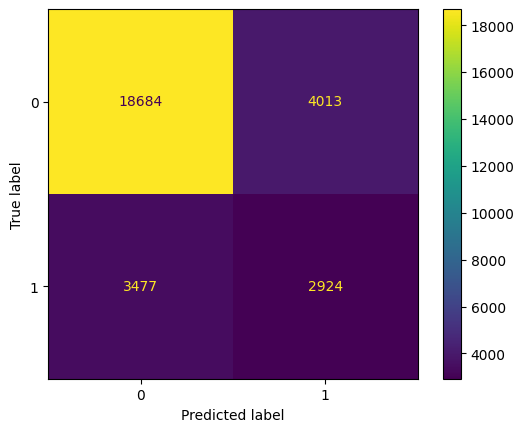

In [216]:
cm = confusion_matrix(y_test, y_predict_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

## GRU

In [32]:
from keras.layers import GRU

In [33]:
model = Sequential()
model.add(GRU(16, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True))
model.add(GRU(16))
model.add(Dense(1, activation='sigmoid'))

In [34]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

a , b = np.unique(y_train, return_counts= True)
count_lable = dict(zip(a,b))
ratio = {0: 1, 1: 0.5*(count_lable[0]/count_lable[1])}
ratio

callback  = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=3,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)


model.fit(x_train, y_train, 
    validation_data=(x_validation, y_validation), 
    epochs=10, 
    class_weight= ratio, 
    callbacks=[callback])

Epoch 1/10
2727/2727 [==============================] - 22s 6ms/step - loss: 0.6696 - accuracy: 0.7643 - val_loss: 0.4911 - val_accuracy: 0.7673
Epoch 2/10
2727/2727 [==============================] - 16s 6ms/step - loss: 0.6358 - accuracy: 0.7738 - val_loss: 0.4902 - val_accuracy: 0.7673
Epoch 3/10
2727/2727 [==============================] - 18s 6ms/step - loss: 0.6203 - accuracy: 0.7774 - val_loss: 0.4818 - val_accuracy: 0.7699
Epoch 4/10
2727/2727 [==============================] - 18s 7ms/step - loss: 0.6095 - accuracy: 0.7810 - val_loss: 0.4840 - val_accuracy: 0.7675
Epoch 5/10
2727/2727 [==============================] - 17s 6ms/step - loss: 0.6005 - accuracy: 0.7837 - val_loss: 0.4885 - val_accuracy: 0.7608
Epoch 6/10
2727/2727 [==============================] - 17s 6ms/step - loss: 0.5937 - accuracy: 0.7861 - val_loss: 0.4894 - val_accuracy: 0.7605
Epoch 6: early stopping


In [35]:
y_hat_validation = model.predict(x_validation)
y_hat_validation

910/910 [==============================] - 3s 2ms/step


array([[0.24257845],
       [0.11210974],
       [0.18607326],
       ...,
       [0.03544174],
       [0.0284108 ],
       [0.13508263]], dtype=float32)

In [36]:
roc_auc_score(y_validation, y_hat_validation)

0.7254316364619404

In [39]:
threshold = set_threshold (y_validation, y_hat_validation, cat_0 = 1, cat_1 = 2, total= 1, start=0.1, end=0.8, num=100)
threshold

0.4747474747474748

In [40]:
y_predict_validation = [0 if val < threshold else 1 for val in y_hat_validation]

print(classification_report(y_validation, y_predict_validation))

              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84     22851
         1.0       0.42      0.42      0.42      6244

    accuracy                           0.75     29095
   macro avg       0.63      0.63      0.63     29095
weighted avg       0.75      0.75      0.75     29095



In [41]:
y_hat_test = model.predict(x_test)
y_predict_test = [0 if val < threshold else 1 for val in y_hat_test]

print(classification_report(y_test, y_predict_test))

910/910 [==============================] - 2s 2ms/step
              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84     22697
         1.0       0.42      0.42      0.42      6401

    accuracy                           0.75     29098
   macro avg       0.63      0.63      0.63     29098
weighted avg       0.75      0.75      0.75     29098



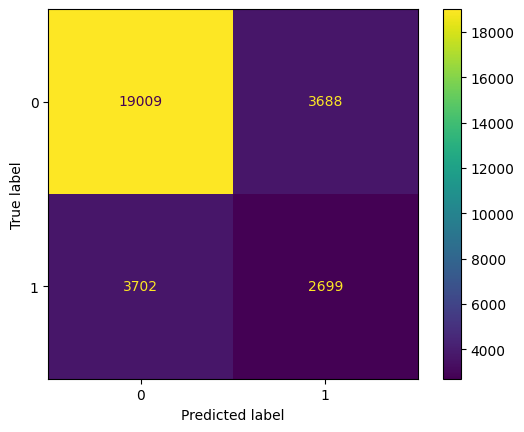

In [42]:
cm = confusion_matrix(y_test, y_predict_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

## GRU + LSTM

In [53]:
model = Sequential()
model.add(LSTM(8, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True))
model.add(GRU(8, return_sequences=True))
model.add(LSTM(8, return_sequences=True))
model.add(GRU(8))
model.add(Dense(1, activation='sigmoid'))

In [54]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

a , b = np.unique(y_train, return_counts= True)
count_lable = dict(zip(a,b))
ratio = {0: 1, 1: 0.5*(count_lable[0]/count_lable[1])}
ratio

callback  = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=3,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)


model.fit(x_train, y_train, 
    validation_data=(x_validation, y_validation), 
    epochs=10, 
    class_weight= ratio, 
    callbacks=[callback])

Epoch 1/10
2727/2727 [==============================] - 38s 11ms/step - loss: 0.6852 - accuracy: 0.7723 - val_loss: 0.5018 - val_accuracy: 0.7644
Epoch 2/10
2727/2727 [==============================] - 29s 11ms/step - loss: 0.6412 - accuracy: 0.7732 - val_loss: 0.4954 - val_accuracy: 0.7628
Epoch 3/10
2727/2727 [==============================] - 28s 10ms/step - loss: 0.6282 - accuracy: 0.7765 - val_loss: 0.5011 - val_accuracy: 0.7545
Epoch 4/10
2727/2727 [==============================] - 29s 11ms/step - loss: 0.6205 - accuracy: 0.7786 - val_loss: 0.4814 - val_accuracy: 0.7699
Epoch 5/10
2727/2727 [==============================] - 29s 11ms/step - loss: 0.6149 - accuracy: 0.7788 - val_loss: 0.4823 - val_accuracy: 0.7696
Epoch 6/10
2727/2727 [==============================] - 29s 11ms/step - loss: 0.6089 - accuracy: 0.7808 - val_loss: 0.5003 - val_accuracy: 0.7487
Epoch 7/10
2727/2727 [==============================] - 30s 11ms/step - loss: 0.6054 - accuracy: 0.7793 - val_loss: 0.4942 -

In [55]:
y_hat_validation = model.predict(x_validation)
y_hat_validation

910/910 [==============================] - 4s 3ms/step


array([[0.04252124],
       [0.08089346],
       [0.10965921],
       ...,
       [0.02782011],
       [0.02453391],
       [0.04705143]], dtype=float32)

In [56]:
roc_auc_score(y_validation, y_hat_validation)

0.7267968751467428

In [57]:
threshold = set_threshold (y_validation, y_hat_validation, cat_0 = 1, cat_1 = 2, total= 1, start=0.1, end=0.8, num=100)
threshold

0.4676767676767677

In [58]:
y_predict_validation = [0 if val < threshold else 1 for val in y_hat_validation]

print(classification_report(y_validation, y_predict_validation))

              precision    recall  f1-score   support

         0.0       0.85      0.82      0.83     22851
         1.0       0.41      0.46      0.43      6244

    accuracy                           0.74     29095
   macro avg       0.63      0.64      0.63     29095
weighted avg       0.75      0.74      0.75     29095



In [61]:
y_hat_test = model.predict(x_test)
y_predict_test = [0 if val < threshold else 1 for val in y_hat_test]

print(classification_report(y_test, y_predict_test))

910/910 [==============================] - 3s 3ms/step
              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83     22697
         1.0       0.41      0.46      0.44      6401

    accuracy                           0.74     29098
   macro avg       0.63      0.64      0.63     29098
weighted avg       0.75      0.74      0.74     29098



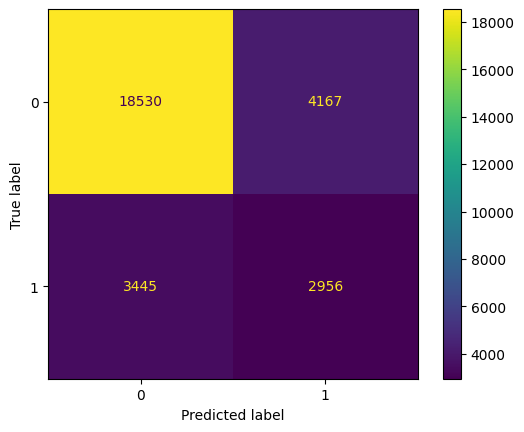

In [62]:
cm = confusion_matrix(y_test, y_predict_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()